<h1 style="color:Teal; font-size: 36px;">Diabetes Data Analysis</h1>





<div>
    <h2 style="color:Teal; display: inline;">Name:</h2>
    <h2 style="color:black; display: inline;">Gizem Ozyildirim</h2>
</div>




<span style="text-decoration: underline; font-size: larger;">Data Analysis</span>



+
 <font color='blue'>`Diabetes Risk Factors Dataset`</font>
 
 Investigating Diabetes Risk Factors and Correlations:
 Pregnancy, 
 Glucose, 
 Skin Thickness, 
 BMI,
 Age 

+
`About Data:`
<br>
The dataset contains features related to individuals' health, possibly focusing on factors relevant to diabetes diagnosis. Ovarall, dataset information relevant to predicting diabetes diagnosis based on various health and demographic factors. It is eligible for classification modeling to predict the likelihood of diabetes based on these features.
Here's a breakdown of each feature:

`* num_preg (Number of Pregnancies):` This feature indicates the number of times the individual has been pregnant (if applicable).

`* glucose_conc (Blood Glucose Concentration):` This feature represents the concentration of glucose (sugar) in the individual's blood, typically measured in milligrams per deciliter (mg/dL).

`* diastolic_bp (Diastolic Blood Pressure):` Diastolic blood pressure is the pressure in the arteries when the heart rests between beats, measured in millimeters of mercury (mmHg).

`* thickness (Skin Thickness Measurement):` This feature likely refers to the measurement of skinfold thickness at a certain body site, often used as an indicator of body composition.

`* insulin:` This feature represents the level of insulin present in the individual's body, usually measured in microunits per milliliter (µU/mL) or milligrams per deciliter (mg/dL), depending on the assay method.

`* bmi (Body Mass Index Value):` Body Mass Index (BMI) is a measure derived from an individual's weight and height, calculated as weight (kg) divided by height squared (m^2). It is commonly used as an indicator of body fatness and potential health risks associated with weight.

`* diab_pred (Diabetes Pedigree Function):` This feature likely represents a numerical score or function that assesses the likelihood of diabetes based on family history and genetic factors.

`* age (Age of the Patient):` This feature indicates the age of the individual in years.

`* diabetes (Diabetes Diagnosis):` This is the target variable indicating whether the individual has been diagnosed with diabetes. A value of 1 typically denotes a positive diagnosis (yes), while a value of 0 denotes a negative diagnosis (no).


+
`Purpose of the Project:` Early detection and prevention by analyzing patterns and correlations between various factors (such as glucose levels, BMI, age, and number of pregnancies) and the presence of diabetes. 


+
`Expected Outcome:` Analysts can reveal valuable insights intto identifying individuals at high risk of developing diabetes. Early detection allows for preventative measures to be taken, potentially delaying or preventing the onset of diabetes

### Part 0
### a. Importing Libraries

In [1]:
# import modules

import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


### b. Gather and prepare the training data

The input file is diabetes-data.csv ([source](https://www.kaggle.com/datasets/ayushparwal2026/diabetes-data))

---
a. __Read data from the `diabetes-data.csv` file into a DataFrame__.<br>
 __print the DataFrame__.


In [2]:
# Read csv the file and check the data size (rows & columns)
df = pd.read_csv('diabetes-data.csv')
# Print the row and column size
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print()


Number of rows: 768
Number of columns: 9



In [3]:
# Checking the data before starting to work on it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Print the first 5 rows of the DataFrame
print("The first 5 rows of the DataFrame:")
print()
df.head()

The first 5 rows of the DataFrame:



,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis

In [5]:
print("The statistically description of the data in the DataFrame:")
print()
df.describe()  

The statistically description of the data in the DataFrame:



,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


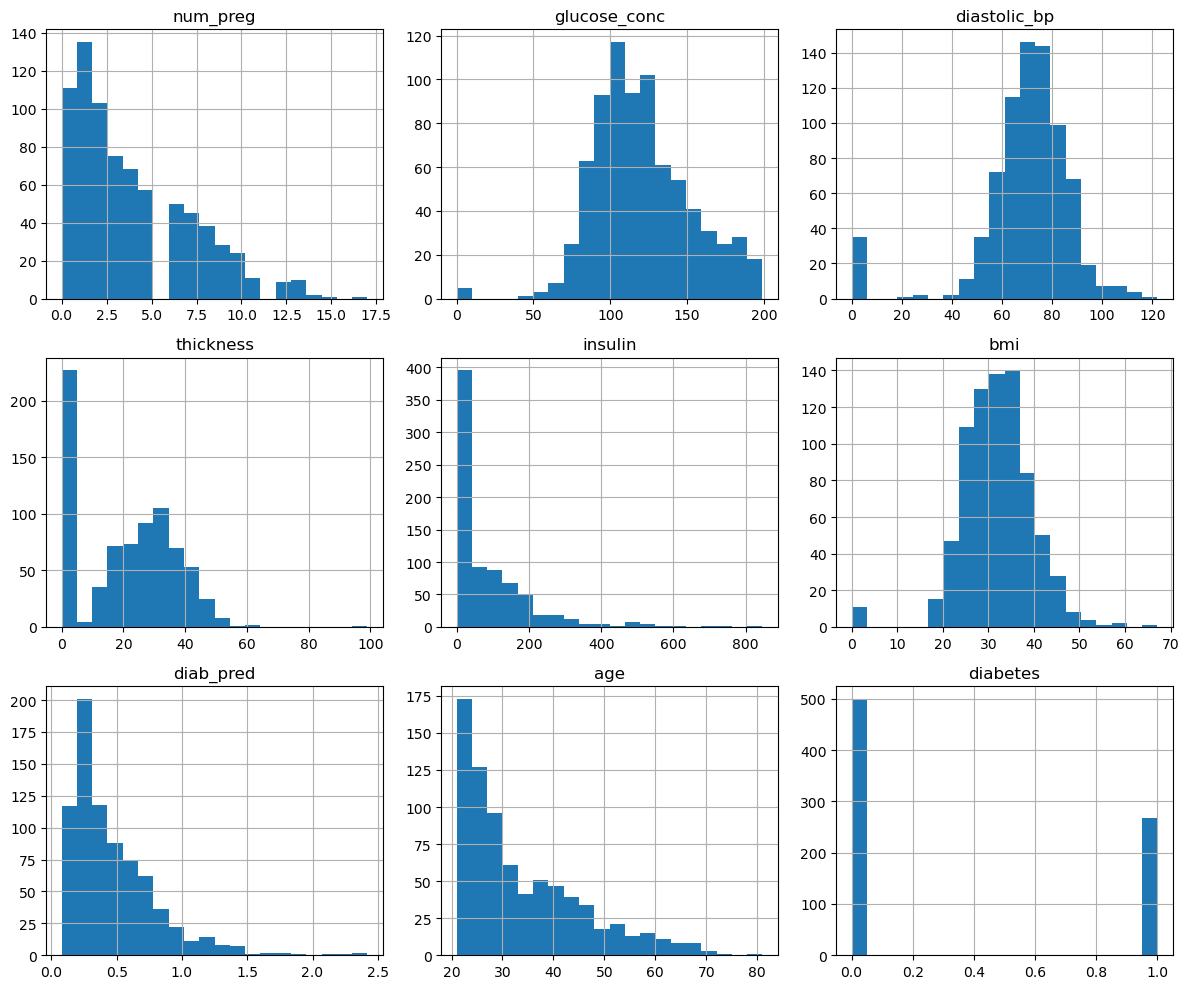

In [6]:
# Histogram plots of the data
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout() 
plt.show()

Observations: 
The statistical data shows that there's an average of 3.85 pregnancies per individual with the data going from a low of 0 to a high of 17 pregnancies (which looks to be an outlier). The average glucose concentration is 120.89 mg/dL, which is an important indicator for diabetes. The standard deviation is 31.97, showing that individuals' glucose levels vary considerably. The standard deviation for the insulin column is large at 115 which indicate a broader spread of values with a high of 846 and a low of zero. The diabetes pedigree function also shows a wide range that averages at 0.472, with the data from low of 0.078 to high of 2.42. The average BMI is 31.99, indicating that the average participant is in the obese category, which is significant given the link between obesity and diabetes. The participants' average age is 33.24 years, with a standard deviation of 11.76, indicating a middle-aged group with a broad age range. The data span from 21 to 81 years, suggesting that the dataset includes a wide age range of adults.

We see some odd things, like zero values for blood sugar, blood pressure or skin thickness, which doesn't make sense and means there might be some mistakes in the data. From the histogram we can see that around 500 individuals have diabetes compared to less than 300 that don't which is what I want to explore in my analysis.  


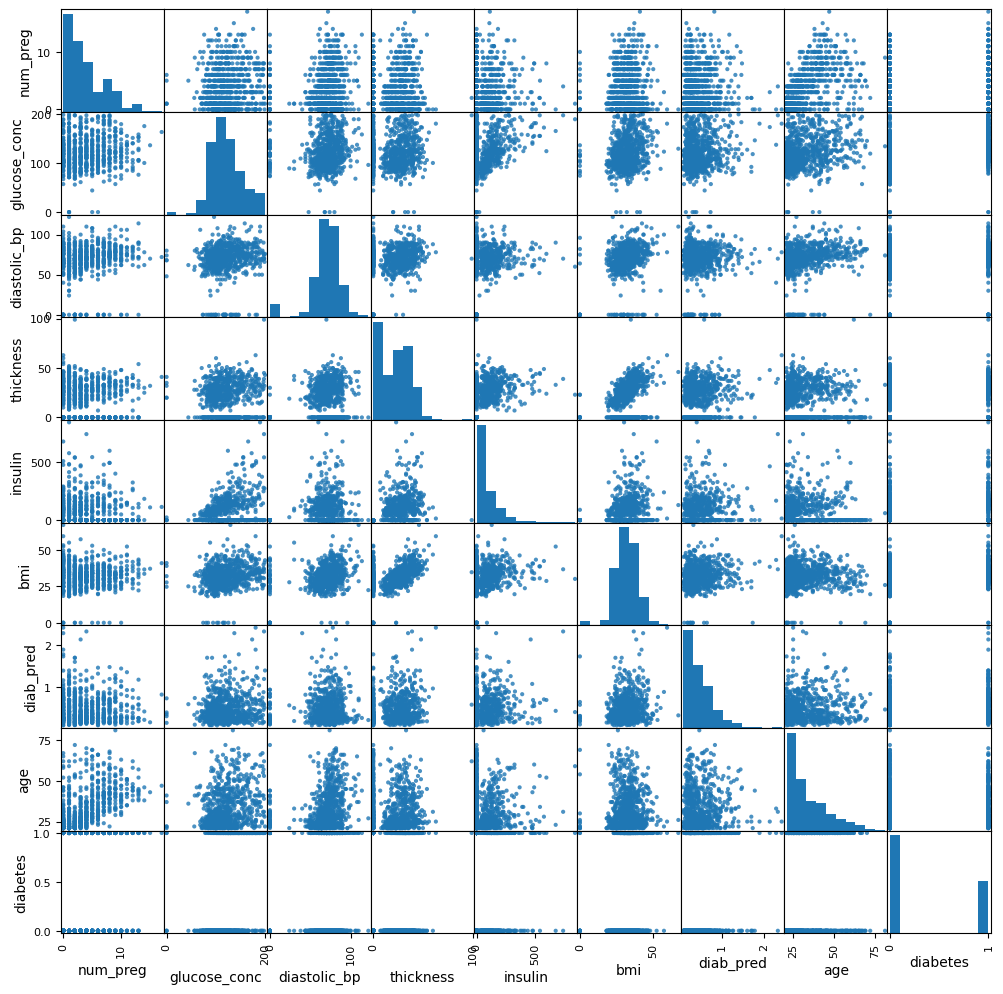

In [7]:
# Scatterplots of the dataset
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(12, 12))

# Show the plot
plt.show()

In [8]:
corr = df.corr()
corr

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The correlation chart above shows the correlation coefficients between various health-related variables in the data, likely related to diabetes. To summarize the results: 

num_preg (Number of Pregnancies) and DiabetesThere's a low positive correlation between the number of pregnancies and diabetes. The scatterplot above confirms this. s.

glucose_conc (Glucose Concentration) and DiabetBased on the correlation coefficient of 0.466581 there seems to be a mild positive correlation on  the diabetes outcome, indicating that higher glucose concentrations are strongly associated with the presence of diab. This agrees with the common knowledge in medicine. The scatterplot however, doesn't seem to support this. tes.

diastolic_bp (Diastolic Blood Pressure): The correlation with diabetes (0.065068) is weak, suggesting that diastolic blood pressure alone might not be a strong indicator of diabetes in this dataset.

thickness (Skin Thickness): Shows a very weak positive correlation (0.074752) with diabetes, indicating a slight relationship but not strong enough to draw significant conclusions.

insulin: There's a weak positive correlation (0.130548) with diabetes, suggesting a mild association between insulin levels and the presence of diabetes.

bmi (Body Mass Index): The correlation (0.292695) with diabetes is moderate, suggesting that higher BMI values are associated with an increased likelihood of diabetes.

diab_pred (Diabetes Pedigree Function): Shows a weak positive correlation (0.173844) with diabetes, indicating a slight genetic influence on diabetes within this dataset.

age: There's a moderate positive correlation (0.238356) with diabetes, suggesting that older age groups have a somewhat higher likelihood of having diabetes.

Correlations Among Independent Variables: Apart from the target variable (diabetes), the chart also shows correlations among the independent variables. For instance, age has a strong positive correlation (0.544341) with the number of pregnancies, and there's a noticeable positive correlation (0.436783) between skin thickness and insulin levels, which might indicate areas of multicollinearity or interdependence worth furttors in the dataset.

In [9]:
print('Count of the number of (not NULL) values in each row:')

df.count()

Count of the number of (not NULL) values in each row:


num_preg        768
glucose_conc    768
diastolic_bp    768
thickness       768
insulin         768
bmi             768
diab_pred       768
age             768
diabetes        768
dtype: int64

---
### c. Clean and prepare the data for analysis 


In [10]:
# Show the number of NaNs in each column
df.isna().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [11]:
# Drop any rows with NaN.  -- This might be unecessary because the data is already clean
cleaned_df = df.dropna()
cleaned_df.isna().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [12]:
# print columns names before organize them.
print(df.columns)

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')


In [13]:
# Re-name the columns for readability.
cleaned_df.columns = ['Pregnancy', 'Glucose', 'DBP', 'SkinThick', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Diabetes']

cleaned_df.head()



,Pregnancy,Glucose,DBP,SkinThick,Insulin,BMI,Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Convert 'Diabetes' column from category to integer
cleaned_df['Diabetes'] = cleaned_df['Diabetes'].astype(int) # It is already INT type so this is unecessary



In [15]:
# print the count of unique values in the 'Diabetes' column
print(cleaned_df['Diabetes'].value_counts())


Diabetes
0    500
1    268
Name: count, dtype: int64


In [16]:
# check the data types of each column in the DataFrame
print(cleaned_df.dtypes)

Pregnancy      int64
Glucose        int64
DBP            int64
SkinThick      int64
Insulin        int64
BMI          float64
Pedigree     float64
Age            int64
Diabetes       int64
dtype: object


---
## Part 1

Statement 1:   What is the distribution of the number of pregnancies among individuals with and
without diabetes?

In [17]:
# The number of pregnancies among individuals with and without diabetes

# Count  of individuals with diabetes who have been pregnant
with_diabetes = cleaned_df[(cleaned_df['Pregnancy'] > 0) & (cleaned_df['Diabetes'] == 1)].shape[0]

# Count of individuals without diabetes who have been pregnant
without_diabetes = cleaned_df[(cleaned_df['Pregnancy'] > 0) & (cleaned_df['Diabetes'] == 0)].shape[0]

print("Number of pregnant woman with diabetes:", with_diabetes)
print("Number of pregnant woman without diabetes :", without_diabetes)

Number of pregnant woman with diabetes: 230
Number of pregnant woman without diabetes : 427


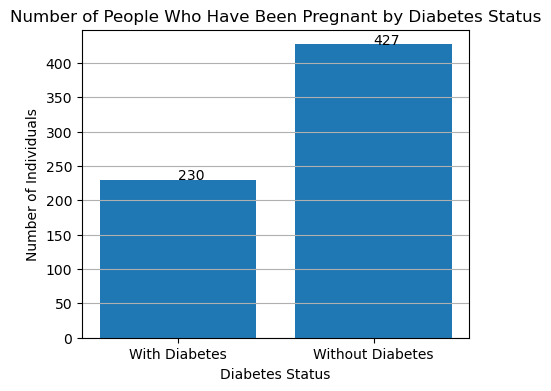

In [18]:
# Checking the distribution of the number of pregnancies among individuals with and without diabetes by plotting
categories = ['With Diabetes', 'Without Diabetes']
people_counts = [with_diabetes, without_diabetes]

# Plotting
plt.figure(figsize=(5, 4))
bars = plt.bar(categories, people_counts)

# Adding value labels directly on top of each bar without specifying alignment
for i, count in enumerate(people_counts):
    plt.text(i, count, str(count))

plt.title('Number of People Who Have Been Pregnant by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Individuals')
plt.grid(axis='y')



---
## Part 2

Statement 2:   Is there any correlation between glucose concentration and diabetes diagnosis?

In [19]:
import numpy as np

# Calculate the correlation coefficient between 'Glucose' and 'Diabetes'
correlation = np.corrcoef(cleaned_df['Glucose'], cleaned_df['Diabetes'])[0, 1]

print("Correlation coefficient between Glucose and Diabetes:", correlation)


Correlation coefficient between Glucose and Diabetes: 0.46658139830687295


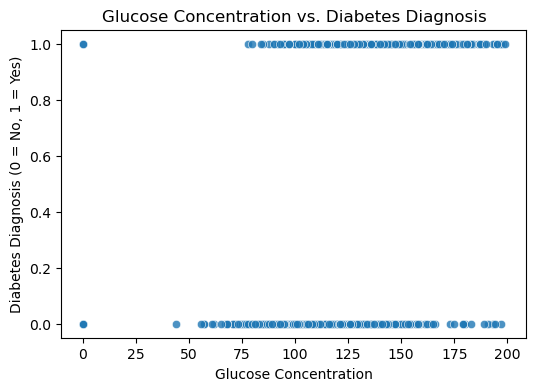

In [23]:

# Setting up the figure
plt.figure(figsize=(6, 4))

# Creating the scatter plot to see the relationship between glucose concentration and diabetes diagnosis
sns.scatterplot(data=cleaned_df, x='Glucose', y='Diabetes', alpha=0.8)

# Adding titles and labels
plt.title('Glucose Concentration vs. Diabetes Diagnosis')
plt.xlabel('Glucose Concentration')
plt.ylabel('Diabetes Diagnosis (0 = No, 1 = Yes)')

# Displaying the plot
plt.show()


The average glucose level for individuals without diabetes ('No Diabetes') is approximately: 109.98
The average glucose level for individuals with diabetes ('Diabetes') is approximately: 141.26


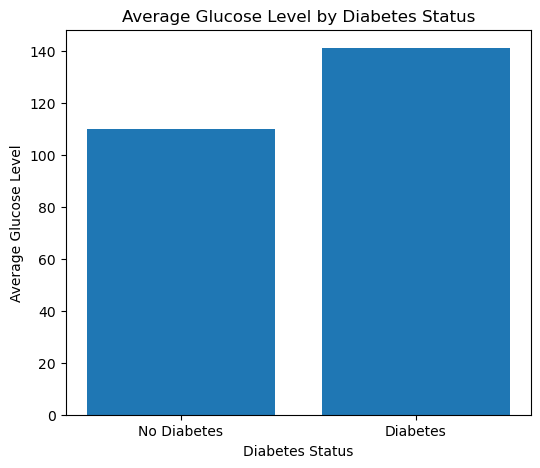

In [21]:
import matplotlib.pyplot as plt

# Assuming cleaned_df contains the data
plt.figure(figsize=(6, 5))

# Calculate average 'Glucose' level for each category of 'Diabetes'
avg_glucose_no_diabetes = cleaned_df[cleaned_df['Diabetes'] == 0]['Glucose'].mean()
avg_glucose_diabetes = cleaned_df[cleaned_df['Diabetes'] == 1]['Glucose'].mean()
print(f"The average glucose level for individuals without diabetes ('No Diabetes') is approximately: {avg_glucose_no_diabetes:.2f}")
print(f"The average glucose level for individuals with diabetes ('Diabetes') is approximately: {avg_glucose_diabetes:.2f}")
diabetes_status = ['No Diabetes', 'Diabetes']
height = [avg_glucose_no_diabetes, avg_glucose_diabetes]
# Plot the bar plot
plt.bar(diabetes_status, height)

# Add labels and title
plt.title('Average Glucose Level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average Glucose Level')

# Show the plot
plt.show()



---
## Part 3

Statement 3: What is the distribution of skin thickness among the individuals with or without pregnancy?  

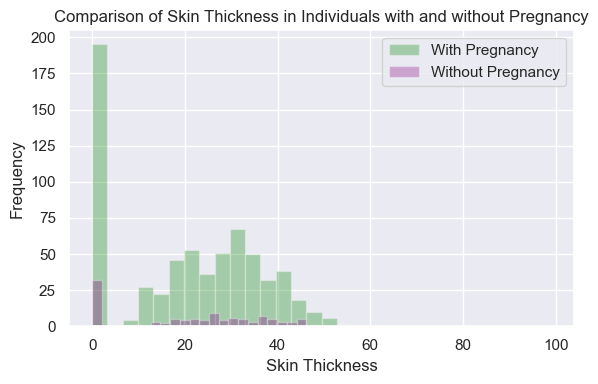

In [36]:
import matplotlib.pyplot as plt

# Filtered data for individuals with and without pregnancy
skin_thickness_with_pregnancy = cleaned_df[cleaned_df['Pregnancy'] > 0]['SkinThick']
skin_thickness_without_pregnancy = cleaned_df[cleaned_df['Pregnancy'] == 0]['SkinThick']

# Plot histogram of 'SkinThick' for individuals with and without pregnancy
plt.figure(figsize=(6, 4))
plt.hist(skin_thickness_with_pregnancy, bins=30, color='green', alpha=0.3, label='With Pregnancy')
plt.hist(skin_thickness_without_pregnancy, bins=30, color='purple', alpha=0.3, label='Without Pregnancy')

# Add labels and title
plt.title('Comparison of Skin Thickness in Individuals with and without Pregnancy')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


---
## Part 4

Statement 4: How does BMI (Body Mass Index) differ between diabetic and non-diabetic
individuals?

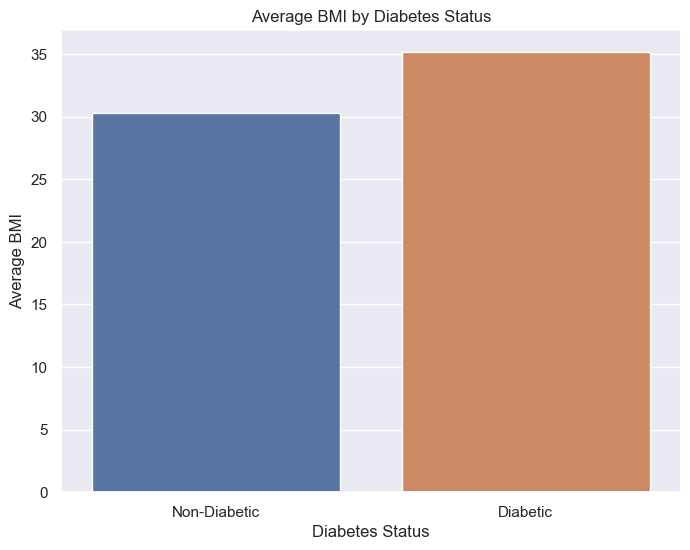

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average BMI for diabetic and non-diabetic individuals
average_bmi = cleaned_df.groupby('Diabetes')['BMI'].mean()

# Plot bar plot for average BMI by diabetes status
plt.figure(figsize=(8, 6))
sns.barplot(x=average_bmi.index, y=average_bmi.values)
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()



---
## Part 5

Statement 5: How does age correlate with the occurrence of diabetes in the dataset?

In [38]:
import numpy as np

# Calculate the correlation coefficient between 'Age' and 'Diabetes'
correlation = np.corrcoef(cleaned_df['Age'], cleaned_df['Diabetes'])[0, 1]

print("Correlation coefficient between Age and Diabetes:", correlation)


Correlation coefficient between Age and Diabetes: 0.23835598302719768


C:\Users\cherr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cherr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


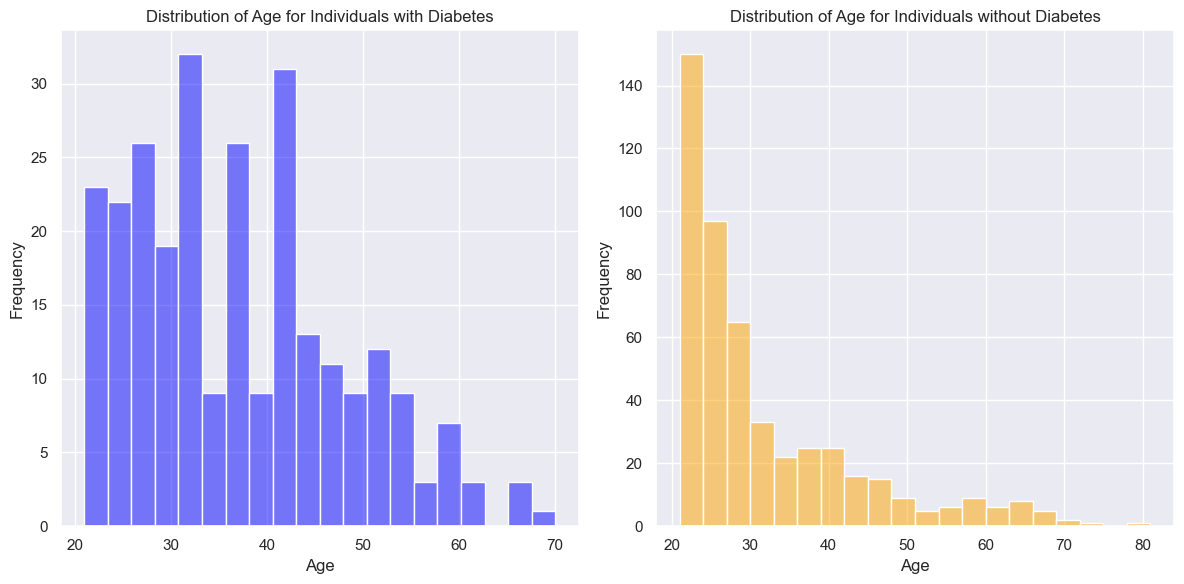

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with two histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for individuals with diabetes
sns.histplot(data=cleaned_df[cleaned_df['Diabetes'] == 1], x='Age', bins=20, color='blue', alpha=0.5, ax=axs[0])
axs[0].set_title('Distribution of Age for Individuals with Diabetes')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Histogram for individuals without diabetes
sns.histplot(data=cleaned_df[cleaned_df['Diabetes'] == 0], x='Age', bins=20, color='orange', alpha=0.5, ax=axs[1])
axs[1].set_title('Distribution of Age for Individuals without Diabetes')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



# Machine Learning


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [60]:
# Preparing the X and y
X = cleaned_df.drop('Diabetes', axis=1)
y = cleaned_df['Diabetes']

# Print the size of each X and y
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (768, 8)
y shape:  (768,)


In [57]:
X.head()

,Pregnancy,Glucose,DBP,SkinThick,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [58]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diabetes, dtype: int32

In [62]:
# Prepare train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, classifier in classifiers.items():
    # Train each classifier
    classifier.fit(X_train, y_train)
    
    # Predict using test data
    y_pred = classifier.predict(X_test)
    
    # Accuracy score of each classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:")
    print(cm)

Decision Tree Accuracy: 0.67
Decision Tree Confusion Matrix:
[[105  46]
 [ 30  50]]
Random Forest Accuracy: 0.74
Random Forest Confusion Matrix:
[[124  27]
 [ 32  48]]
KNN Accuracy: 0.69
KNN Confusion Matrix:
[[114  37]
 [ 35  45]]


In [70]:
# Most accurate is the Random Forest. I will use it to make predictions. I will test with new made up data

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

X_newdf = pd.DataFrame({
    'Pregnancy': [2, 5, 3, 1, 4],
    'Glucose': [148, 85, 183, 89, 137],
    'DBP': [72, 66, 64, 66, 40],
    'SkinThick': [35, 29, 0, 23, 35],
    'Insulin': [0, 0, 0, 94, 168],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
    'Pedigree': [0.627, 0.351, 0.672, 0.167, 2.288],
    'Age': [50, 31, 32, 21, 33]
})

X_newdf

,Pregnancy,Glucose,DBP,SkinThick,Insulin,BMI,Pedigree,Age
0,2,148,72,35,0,33.6,0.627,50
1,5,85,66,29,0,26.6,0.351,31
2,3,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,4,137,40,35,168,43.1,2.288,33


In [72]:
y_new_pred = rf.predict(X_newdf)
y_new_pred

array([1, 0, 1, 0, 1])

In [76]:
y_new_pred = pd.Series(y_new_pred, name='Diabetes_Prediction')

results_df = X_newdf.copy()
results_df['Diabetes_Prediction'] = y_new_pred.values
results_df

,Pregnancy,Glucose,DBP,SkinThick,Insulin,BMI,Pedigree,Age,Diabetes_Prediction
0,2,148,72,35,0,33.6,0.627,50,1
1,5,85,66,29,0,26.6,0.351,31,0
2,3,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1
